In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Let's consider as an example

f = sqrt(x) * sin(x^3)

In [ ]:
def f(x):
  return np.sqrt(x)*np.sin(np.power(x, 3))

linspace creates a list of values from 1 to 2 (in this case) with total number of points = 200

In [ ]:
xs = np.linspace(1, 2, 200)

fs = f(xs)  # evaluate the function

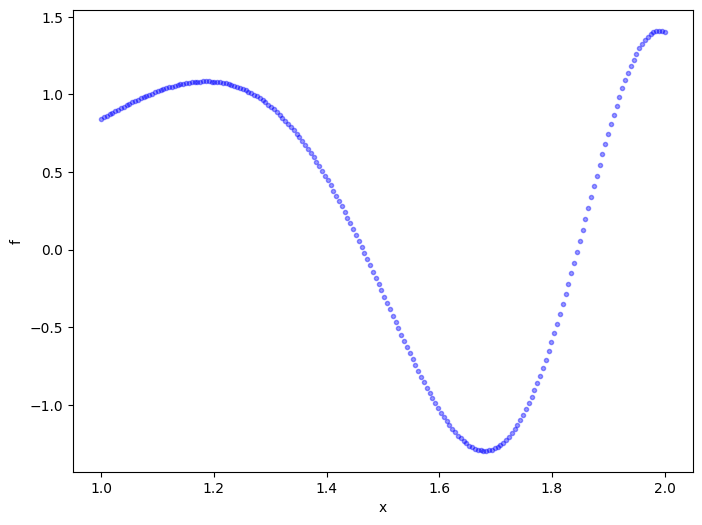

In [ ]:
# Let's plot the function to see how it looks

plt.figure(figsize=[8, 6])
plt.plot(xs, fs, 'b.', alpha=0.4)

plt.xlabel("x")
plt.ylabel("f")

plt.show()
plt.close()

In [ ]:
# Let's approximate it with polynomials

approx_3 = np.polyfit(xs, fs, 3)  # cubic
approx_5 = np.polyfit(xs, fs, 5)  # 5th order
approx_7 = np.polyfit(xs, fs, 7)  # 7th order


In [ ]:
# What's inside?
approx_5

array([ -158.82935901,  1187.26986425, -3475.34322437,  4979.27502796,
       -3495.24603609,   963.9527005 ])

A bunch of coefficients in polynomial expansions. The coefficients are ordered in "reverse" order compared to how we write them in class

In [ ]:
# Let's see how well they approximate

## first, evaluate the polynomials for the same range
fit_3 = np.polyval(approx_3, xs)
fit_5 = np.polyval(approx_5, xs)
fit_7 = np.polyval(approx_7, xs)

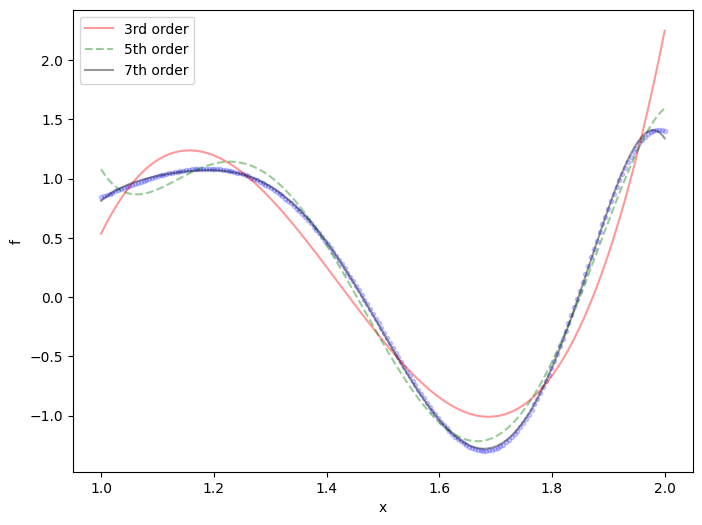

In [ ]:
plt.figure(figsize=[8, 6])

# plot the original
plt.plot(xs, fs, 'b.', alpha=0.2)
plt.plot(xs, fit_3, 'r-', alpha=0.4, label="3rd order")
plt.plot(xs, fit_5, 'g--', alpha=0.4, label="5th order")
plt.plot(xs, fit_7, 'k-', alpha=0.4, label="7th order")

plt.xlabel("x")
plt.ylabel("f")

plt.legend(loc="upper left")

plt.show()
plt.close()

As you can see, the 7th order polynomial works pretty well.
What are the coefficients?

In [ ]:
list(reversed(approx_7))

[-1916.0298296966207,
 8914.751899382547,
 -17227.127179864216,
 17759.67763107357,
 -10390.80977969017,
 3359.4459313534476,
 -524.2819293865131,
 25.1850244120264]

Thus, we can write

f = -1916 + 8915*x - 17227*x^2 + 17760*x^3-10391*x^4+3359*x^5-524*x^6+25*x^7

How about trigonometric functions? Can we approximate f(x) as a sum of sin/cos (Fourier series)?

Algorithms exist to do just that. They are called Fast Fourier Transform (FFT)

In [ ]:
ft = np.fft.fft(fs)

What's inside? A bunch of coefficients. Pay attention to whic ones are the biggest

In [ ]:
ft

array([45.08969346+0.00000000e+00j, 73.82183322-9.18363615e+01j,
       21.29782367+3.25431595e+01j, -0.40303693+1.45942258e+01j,
       -1.47728373+7.63272014e+00j, -1.21482542+5.01824983e+00j,
       -0.96675351+3.73973618e+00j, -0.79541806+2.99148327e+00j,
       -0.67811354+2.50032272e+00j, -0.59556251+2.15217114e+00j,
       -0.53564595+1.89164932e+00j, -0.4909158 +1.68876301e+00j,
       -0.45669443+1.52587327e+00j, -0.42995395+1.39192465e+00j,
       -0.40867435+1.27962853e+00j, -0.39147005+1.18397862e+00j,
       -0.37736662+1.10141799e+00j, -0.36566339+1.02934687e+00j,
       -0.35584639+9.65818885e-01j, -0.34753195+9.09346422e-01j,
       -0.340429  +8.58772016e-01j, -0.33431361+8.13180873e-01j,
       -0.32901122+7.71839942e-01j, -0.32438418+7.34154573e-01j,
       -0.32032275+6.99637069e-01j, -0.3167386 +6.67883494e-01j,
       -0.31355999+6.38556289e-01j, -0.31072817+6.11371080e-01j,
       -0.30819464+5.86086516e-01j, -0.30591912+5.62496375e-01j,
       -0.30386789+5.4042

Polynomial Approximation for sin and cos

In [ ]:
phis = np.linspace(0, np.pi/2, 50)

sin_exact = np.sin(phis)
cos_exact = np.cos(phis)

sin_approx = phis
cos_approx = 1 - np.power(phis, 2)/2

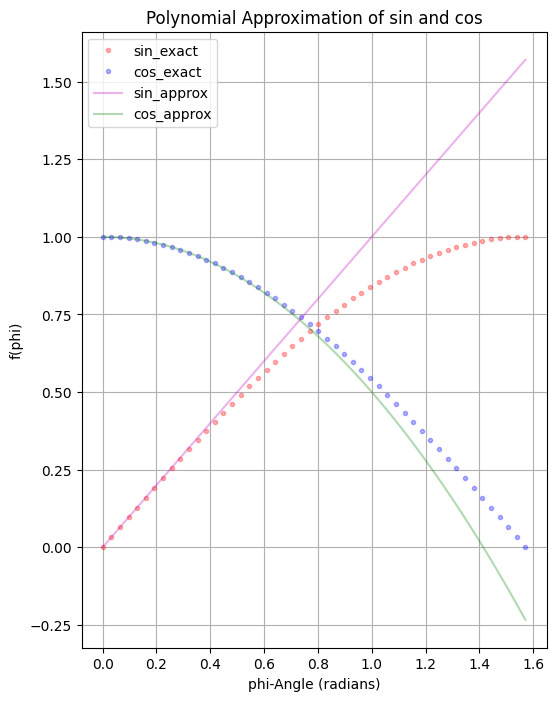

In [ ]:
plt.figure(figsize=[6,8])

plt.plot(phis, sin_exact, 'r.', alpha=0.3, label="sin_exact")
plt.plot(phis, cos_exact, 'b.', alpha=0.3, label="cos_exact")

plt.plot(phis, sin_approx, 'm-', alpha=0.3, label="sin_approx")
plt.plot(phis, cos_approx, 'g-', alpha=0.3, label="cos_approx")

plt.xlabel("phi-Angle (radians)")
plt.ylabel("f(phi)")

plt.legend(loc="upper left")
plt.title("Polynomial Approximation of sin and cos")
plt.grid(1)

plt.show()
plt.close()